# Sprint Machine learning flow

## About this Sprint


### Purpose of Sprint
* Know the practical flow of machine learning
* Complete a model with high generalization performance


### How to learn
After making it possible to perform careful verification, we will proceed with the creation of a model with high generalization performance by referring to the solutions of others.

## Machine learning flow

Learn the practical flow of machine learning from Kaggle's Home Credit Default Risk competition.
We aim to complete a model with high generalization performance by conducting particularly appropriate verification.


Home Credit Default Risk | Kaggle  
https://www.kaggle.com/c/home-credit-default-risk

### [Problem 1] Cross validation
Create and execute code that cross-validates the baseline model created in the pre-learning period assignment with the KFold class.

sklearn.model_selection.KFold — scikit-learn 0.21.3 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold

In [ ]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.simplefilter('ignore')
pd.options.display.max_columns = None

In [ ]:
# Read train data
train = pd.read_csv('application_train.csv')
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# Extraction of explanatory variables and objective variables
feature = ['DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY']

X = train[feature]
y = train['TARGET']

print('X.shape:\n',X.shape,'\nx:\n',X.head())
print('y.shape:\n',y.shape,'\ny:\n',y.head())

X = X.values
y = y.values

X.shape:
 (307511, 2) 
x:
    DAYS_BIRTH  REGION_RATING_CLIENT_W_CITY
0       -9461                            2
1      -16765                            1
2      -19046                            2
3      -19005                            2
4      -19932                            2
y.shape:
 (307511,) 
y:
 0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

* Perform cross-validation

In [ ]:
# Cross-validation
kf = KFold(n_splits=5,random_state=None, shuffle=False)
count = 0

# Regression baseline model
clf = RandomForestClassifier(max_depth=2, random_state=0)

# Rating R2
evaluation = []

# Standardization
scaler = StandardScaler()
scaler.fit_transform(X)

for train_index, valid_index in kf.split(X):
    count += 1
    print('KFold',count,'/',kf.get_n_splits())
    
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
    
    y_train = y_train.ravel() 
    y_valid = y_valid.ravel() 
    
    # Modeling with train data
    clf.fit(X_train, y_train)
    
    # Prediction for validation data
    y_pred = clf.predict_proba(X_valid)[:,1]
    
    # Evaluation
    score = roc_auc_score(y_valid, y_pred)
    print('AUC : ',score)
    evaluation.append(score)
    
print('Mean:{:.3f}'.format(np.mean(evaluation)))

KFold 1 / 5
AUC :  0.5994484769814807
KFold 2 / 5
AUC :  0.5941802915825791
KFold 3 / 5
AUC :  0.5986586053334103
KFold 4 / 5
AUC :  0.5946460915356349
KFold 5 / 5
AUC :  0.5992880784245722
Mean:0.597


### [Problem 2] Grid search

Use scikit-learn's GridSearchCV to create the code to do the grid search.
Then do some parameter tuning on the baseline model.
Please refer to the official documentation of the method used to determine which parameters to tune.

sklearn.model_selection.GridSearchCV — scikit-learn 0.21.3 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html  

* Perform grid search


In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
# Extraction of explanatory variables and objective variables
feature = ['DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY']

X = train[feature]
y = train['TARGET']

print('X.shape:\n',X.shape,'\nx:\n',X.head())
print('y.shape:\n',y.shape,'\ny:\n',y.head())

X = X.values
y = y.values

X.shape:
 (307511, 2) 
x:
    DAYS_BIRTH  REGION_RATING_CLIENT_W_CITY
0       -9461                            2
1      -16765                            1
2      -19046                            2
3      -19005                            2
4      -19932                            2
y.shape:
 (307511,) 
y:
 0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64


In [ ]:
# Standardization
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 1.50687967, -0.06269853],
       [-0.16682127, -2.05181324],
       [-0.68950909, -0.06269853],
       ...,
       [ 0.24541696,  1.92641617],
       [ 0.93400832, -0.06269853],
       [-0.18767379, -2.05181324]])

In [ ]:
# Baseline model
model = RandomForestClassifier()

# Grid search
parameters = {'max_depth': [2, 3, 4]}

clf = GridSearchCV(model, parameters, cv=5, scoring='roc_auc')
clf.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
cv_result = pd.DataFrame(clf.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.355670,0.323354,0.363757,0.007761,2,{'max_depth': 2},0.597131,0.593893,0.599179,0.595064,0.599987,0.597051,0.002327,3
1,8.754939,0.129065,0.414260,0.005765,3,{'max_depth': 3},0.602222,0.599097,0.600505,0.597532,0.601299,0.600131,0.001655,2
2,11.125104,0.200828,0.448496,0.003531,4,{'max_depth': 4},0.603495,0.601057,0.602768,0.598838,0.604004,0.602032,0.001883,1


In [ ]:
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

###[Problem 3] Survey from Kaggle Notebooks


* Encode non-numeric data into numerical data (adopted)
* Complement missing value data (adopted)
* Correct outlier data (adopted)
* Create a new feature (adopted)
* Create features with binning
* Select features (for example, make only one of two highly correlated features) (adopted)
* Create relevant features from other csv files

* With parameter tuning, stop early in order to search comprehensively without spending as much time as possible.
  use
* Randomly extract the number of samples used for calculation to reduce the amount of calculation.
  (Used for estimation)

### [Problem 4] Creating a model with high generalization performance


### Summary of verification results of [Problem 4]

Here is a summary of the verified contents as a model with high generalization performance.

Validation 1: Random forest parameters tuned (result cell 155)
'max_depth': Validate 5 [1, 2, 3, 4, 5]. The higher the number, the better the CV score. (0.70 → 0.72)
  
Verification 2: Try other parameters of Random Forest (Result 158)
'n_estimators': [100,200,300],
'min_samples_leaf': [5,10,15],
'min_samples_split': [1,2,5],
Verified with 27 combinations. The larger n_estimators, the better the CV score. (0.72 → 0.73)
  
Verification 3: Carefully select features from the computational contribution of random forest (Result 217)
In conclusion, the CV score dropped slightly (0.71)

Verification 4: Reduce high features to one side from the feature correlation coefficient (Result 235)
In conclusion, the CV score dropped slightly (0.61 → 0.60 * 1)

* 1 Computational complexity (time convenience) The CV scores of logistic regression were compared.

Verification 5: Try using a gradient boosting tree famous for kaggle (result 240)
Parameter n_estimators': As a result of verification with [100,200],
The result was better than the previous model. (0.76)

In [ ]:
# Read train data
train = pd.read_csv('application_train.csv')
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# Read test data
test = pd.read_csv('application_test.csv')
print('Training data shape: ', test.shape)
test.head()

Training data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

#### Encode

In [ ]:
# オブジェクトデータの確認
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
# カテゴリデータをエンコード
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0

for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            train[col] = le.transform(train[col])
            test[col] = le.transform(test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [ ]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

CODE_GENDER                    3
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
# one-hot エンコード
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [ ]:
# トレインデータの変数量をテストデータに合わせて整形
train_labels = train['TARGET']
train, test = train.align(test, join = 'inner', axis = 1)

train['TARGET'] = train_labels

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


#### 数値データの修正（異常値など）

In [ ]:
# 数値の修正
train['DAYS_BIRTH'] = (train['DAYS_BIRTH']/-365)
train['DAYS_BIRTH'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [ ]:
test['DAYS_BIRTH'] = (test['DAYS_BIRTH']/-365)
test['DAYS_BIRTH'].describe()

count    48744.000000
mean        44.022150
std         11.851782
min         20.104110
25%         34.235616
50%         43.246575
75%         53.800000
max         69.027397
Name: DAYS_BIRTH, dtype: float64

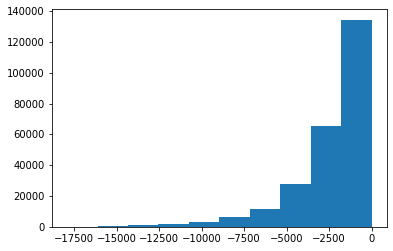

In [ ]:
# 異常値の修正
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
plt.hist(train['DAYS_EMPLOYED']);

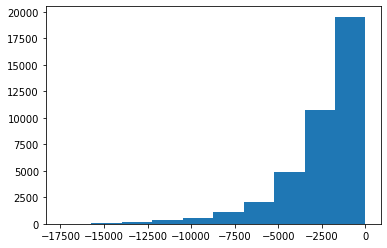

In [ ]:
# 異常値の修正
test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
plt.hist(test['DAYS_EMPLOYED']);

#### 欠損値の補完

In [ ]:
# 欠損値を確認
data = train

missing = data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending=False)
missing_df = pd.DataFrame({'欠損数':missing,
                           '欠損率':missing/len(data)*100})

print('欠損値を含む列数:',len(missing_df))

欠損値を含む列数: 62


In [ ]:
# 欠損値を補完
mean = train.mean()

train_fill_mean = train.fillna(mean)

In [ ]:
# 欠損値を確認
data = train_fill_mean

missing = data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending=False)
missing_df = pd.DataFrame({'欠損数':missing,
                           '欠損率':missing/len(data)*100})

print('欠損値を含む列数:',len(missing_df))

欠損値を含む列数: 0


#### 前処理（標準化）

ロジスティック回帰も使用するので、標準化する（ランダムフォレストには影響がないようだ、、）

In [ ]:
# 特徴量の選択（TARGET以外使用）
feature = []
for i in train_fill_mean:
    if i not in 'TARGET':
        feature.append(i)
print('特徴量数:',len(feature))

特徴量数: 239


In [ ]:
X = train_fill_mean[feature].values
y = train_fill_mean['TARGET'].values

In [ ]:
# 標準化
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.73342255, -0.32439532, -0.71791354, ..., -0.13321491,
         0.96376312, -0.08733962],
       [-1.73341283, -0.32439532, -0.71791354, ..., -0.13321491,
         0.96376312, -0.08733962],
       [-1.7334031 ,  3.08265852,  1.39292539, ..., -0.13321491,
        -1.03759936, -0.08733962],
       ...,
       [ 1.73239096, -0.32439532, -0.71791354, ..., -0.13321491,
         0.96376312, -0.08733962],
       [ 1.73240069, -0.32439532, -0.71791354, ..., -0.13321491,
         0.96376312, -0.08733962],
       [ 1.73241042, -0.32439532, -0.71791354, ..., -0.13321491,
         0.96376312, -0.08733962]])

In [ ]:
print('shape: ', X.shape)

shape:  (307511, 239)


#### パラメータチューニング

In [ ]:
# ベースラインモデル
model = RandomForestClassifier()

# グリッドサーチ
parameters = {'criterion': ["gini", "entropy"],
              'max_depth': [1, 2, 3, 4, 5],
              'random_state':[0]}

clf = GridSearchCV(model, parameters, cv=5, scoring='roc_auc')
clf.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
cv_result = pd.DataFrame(clf.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.563335,0.500808,0.446890,0.005367,gini,1,0,"{'criterion': 'gini', 'max_depth': 1, 'random_...",0.700583,0.707369,0.702116,0.702157,0.707514,0.703948,0.002909,9
1,20.791411,0.124324,0.572181,0.002330,gini,2,0,"{'criterion': 'gini', 'max_depth': 2, 'random_...",0.710340,0.716368,0.709057,0.710820,0.714856,0.712288,0.002815,8
2,29.258054,0.132229,0.681816,0.005524,gini,3,0,"{'criterion': 'gini', 'max_depth': 3, 'random_...",0.714917,0.720135,0.713571,0.715798,0.719821,0.716849,0.002654,5
3,37.524557,0.188534,0.790914,0.003872,gini,4,0,"{'criterion': 'gini', 'max_depth': 4, 'random_...",0.717531,0.721869,0.715649,0.718247,0.722258,0.719111,0.002559,4
4,46.211255,0.177868,0.830250,0.005748,gini,5,0,"{'criterion': 'gini', 'max_depth': 5, 'random_...",0.722615,0.727008,0.718880,0.720916,0.723135,0.722511,0.002697,1
5,12.717718,0.065647,0.451169,0.004450,entropy,1,0,"{'criterion': 'entropy', 'max_depth': 1, 'rand...",0.700043,0.706448,0.699643,0.701679,0.708195,0.703202,0.003477,10
6,21.803508,0.241987,0.579169,0.004500,entropy,2,0,"{'criterion': 'entropy', 'max_depth': 2, 'rand...",0.709943,0.714934,0.708039,0.712135,0.717520,0.712514,0.003397,7
7,30.785131,0.110509,0.681714,0.007765,entropy,3,0,"{'criterion': 'entropy', 'max_depth': 3, 'rand...",0.714025,0.717678,0.709965,0.714117,0.717357,0.714628,0.002797,6
8,39.767486,0.340175,0.788883,0.007365,entropy,4,0,"{'criterion': 'entropy', 'max_depth': 4, 'rand...",0.718302,0.721616,0.713822,0.718988,0.724585,0.719463,0.003585,3
9,49.525036,0.461093,0.830870,0.007109,entropy,5,0,"{'criterion': 'entropy', 'max_depth': 5, 'rand...",0.722498,0.723369,0.716591,0.721122,0.726277,0.721972,0.003176,2


#### 考察１
前処理を行った訓練データに対して、ランダムフォレストでの学習、推定を行なった。  
主なモデルパラメータとして、criterion, max_depth。

木の深さは、深ければ深いほど精度は上がるが時間がかかる。  
（サーチするパラメータとして、選ぶ必要がなかったようだ。）

クライテリアでは、若干ジニのほうが精度が上がりそう。

In [ ]:
# ベースラインモデル
model = RandomForestClassifier()

# グリッドサーチ
parameters = {'n_estimators': [100,200,300],
              'min_samples_leaf': [5,10,15],
              'min_samples_split': [1,2,5],
              'random_state':[0]}

clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc')
clf.fit(X, y)

In [ ]:
cv_result = pd.DataFrame(clf.cv_results_)
cv_result

#### 考察２
ランダムフォレストのパラメータを3つ（'n_estimators': [100,200,300],'min_samples_leaf': [5,10,15],'min_samples_split': [1,2,5]）をグリッドサーチでより良いモデルを探した。
結果から、'n_estimators'が大きほうが計算時間はかかるが、モデルは良くなるようだ。
残りの2つのパラメータは、性能に大きな差はなく、今回は重要なパラメータではないようだ。

* ロジスティック回帰のパラメータを変えてモデル性能を確認してみる

In [ ]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression

# ベースラインモデル
model = LogisticRegression()

# グリッドサーチ
parameters = {'C': [0.01,0.1,1,10,100],
              'random_state':[0]}

clf = GridSearchCV(model, parameters, cv=4, scoring='roc_auc')
clf.fit(X, y)

In [ ]:
cv_result = pd.DataFrame(clf.cv_results_)
cv_result

* TARGETの相関係数と、ランダムフォレストの特徴量の寄与度を比較して、可能であれば、不要な特徴量を削除する

In [ ]:
# 既存の説明変数を使用して、新たに特徴量を作成する。
train_fill_mean['CREDIT_INCOME_PERCENT'] = \
train_fill_mean['AMT_CREDIT'] / train_fill_mean['AMT_INCOME_TOTAL']

train_fill_mean['ANNUITY_INCOME_PERCENT'] = \
train_fill_mean['AMT_ANNUITY'] / train_fill_mean['AMT_INCOME_TOTAL']

train_fill_mean['CREDIT_TERM'] = \
train_fill_mean['AMT_ANNUITY'] / train_fill_mean['AMT_CREDIT']

train_fill_mean['DAYS_EMPLOYED_PERCENT'] = \
train_fill_mean['DAYS_EMPLOYED'] / train_fill_mean['DAYS_BIRTH']

In [ ]:
print('Training Features shape: ', train_fill_mean.shape)

In [ ]:
corr = train_fill_mean.corr()['TARGET'].sort_values(ascending=False)

print(corr.head(15))
print(corr.tail(15))

In [ ]:
# 特徴量の選択（TARGET以外使用）
feature = []
for i in train_fill_mean:
    if i not in ['SK_ID_CURR','TARGET']:
        feature.append(i)
print('特徴量数:',len(feature))

In [ ]:
X = train_fill_mean[feature].values
y = train_fill_mean['TARGET'].values

In [ ]:
# ランダムフォレストの特徴量の重要度を確認
clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
clf.fit(X, y)

feature_importance_values = clf.feature_importances_

feature_importances = pd.DataFrame({'feature': feature,
                                    'importance': feature_importance_values})

In [ ]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. 
    This can work with any measure of 
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `feature` and the importances in a column called `importance'
        
    Returns:
        shows a plot of the (top_n=30) most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    top_n = 30
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (20,20))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:top_n]))), 
            df['importance_normalized'].head(top_n), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:top_n]))))
    ax.set_yticklabels(df['feature'].head(top_n),size=20)
    
    # Plot labeling
    plt.xlabel('Normalized Importance',size=20)
    plt.title('Feature Importances',size=20)
    plt.show()
    
    return df

In [ ]:
# Show the feature importances for the default features Top 30
feature_importances_sorted = plot_feature_importances(feature_importances)

* TAGETの相関係数のトップ15（正負）と、ランダムフォレストへの寄与度のトップ30は、上位の変数に
  違いはあまり見られない。次は、特徴量を減らしてみる。

In [ ]:
feature_importances = \
feature_importances.sort_values('importance',ascending = False)

select_feature = feature_importances.head(30)

In [ ]:
feature = []
for i in select_feature['feature']:
    feature.append(i)
feature

In [ ]:
X = train_fill_mean[feature].values
y = train_fill_mean['TARGET'].values

In [ ]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression

# ベースラインモデル
model = LogisticRegression()

# グリッドサーチ
parameters = {'C': [0.01,0.1,1,10,100],
              'random_state':[0]}

clf = GridSearchCV(model, parameters, cv=4, scoring='roc_auc')
clf.fit(X, y)

In [ ]:
cv_result = pd.DataFrame(clf.cv_results_)
cv_result.T

In [ ]:
# ランダムフォレスト
model = RandomForestClassifier()

# グリッドサーチ
parameters = {'n_estimators': [100],
              'random_state':[0]}

clf = GridSearchCV(model, parameters, cv=4, scoring='roc_auc')
clf.fit(X, y)

In [ ]:
cv_result = pd.DataFrame(clf.cv_results_)
cv_result.T

#### 考察３
特徴量をランダムフォレストの寄与度で上位30を使って、ロジスティック回帰とランダムフォレストで
検証したが、どちらも全変数を使用した時よりも、モデル性能は僅かに下がる結果となった。
今回の特徴量の選択は、上手く抽出できてないようなので、次は、全変数のパラメータの相関係数を見て、
片方だけにできるものがあるか確認する。

In [ ]:
feature = []
for i in train_fill_mean:
    if i not in ['SK_ID_CURR','TARGET']:
        feature.append(i)
print('特徴量数:',len(feature))

In [ ]:
X = train_fill_mean[feature]
y = train_fill_mean['TARGET']

In [ ]:
corr_matrix = X.corr().abs()
corr_matrix.head()

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(corr_matrix,interpolation='nearest',vmin=0,vmax=1,cmap='jet')
plt.colorbar()
plt.show()

In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

In [ ]:
# Threshold for removing correlated variables
threshold = 0.9

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

In [ ]:
to_drop

In [ ]:
X = X.drop(columns = to_drop)

In [ ]:
print('Training Features shape: ', X.shape)

In [ ]:
X = X.values

In [ ]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression

# ベースラインモデル
model = LogisticRegression()

# グリッドサーチ
parameters = {'C': [0.01,0.1,1,10,100],
              'random_state':[0]}

clf = GridSearchCV(model, parameters, cv=4, scoring='roc_auc')
clf.fit(X, y)

In [ ]:
cv_result = pd.DataFrame(clf.cv_results_)
cv_result.T

#### 考察４
性能向上とは、ならず、、、

* 気分を変えて、LightGBMを使ってみる

In [ ]:
feature = []
for i in train_fill_mean:
    if i not in ['SK_ID_CURR','TARGET']:
        feature.append(i)
print('特徴量数:',len(feature))

In [ ]:
X = train_fill_mean[feature].values
y = train_fill_mean['TARGET'].values

In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier()

parameters = {'n_estimators': [100,200],
              'random_state':[0]}

clf = GridSearchCV(model, parameters, cv=4, scoring='roc_auc')
clf.fit(X, y)

In [ ]:
cv_result = pd.DataFrame(clf.cv_results_)
cv_result.T

#### 考察５
気分を変えて、kaggleではお馴染みになっている？LightGBMを使ってみた。  
モデル性能は、ランダムフォレストやロジスティック回帰よりも良くなった。  
CV score(0.76)  
これまで,ランダムフォレスト0.73、ロジスティック回帰0.62

### 【問題5】最終的なモデルの選定
最終的にこれは良いというモデルを選び、推定した結果をKaggleに提出してスコアを確認してください。  
どういったアイデアを取り入れ、どの程度のスコアになったかを記載してください。

提出時の主な前処理など、
* エンコード・・・カテゴリデータをラベルエンコード、ワンホットエンコード併用して数値化
* 欠損値・・・処理しない
* 異常値・・・'DAYS_EMPLOYED'=365243をNaNに修正
* スケーリング・・・しない
* 特徴量・・・ノートブックを参考に4つ追加

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
# 既存の説明変数を使用して、新たに特徴量を作成する。
train['CREDIT_INCOME_PERCENT'] = \
train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']

train['ANNUITY_INCOME_PERCENT'] = \
train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']

train['CREDIT_TERM'] = \
train['AMT_ANNUITY'] / train['AMT_CREDIT']

train['DAYS_EMPLOYED_PERCENT'] = \
train['DAYS_EMPLOYED'] / train['DAYS_BIRTH']

In [ ]:
test['CREDIT_INCOME_PERCENT'] = \
test['AMT_CREDIT'] / test['AMT_INCOME_TOTAL']

test['ANNUITY_INCOME_PERCENT'] = \
test['AMT_ANNUITY'] / test['AMT_INCOME_TOTAL']

test['CREDIT_TERM'] = \
test['AMT_ANNUITY'] / test['AMT_CREDIT']

test['DAYS_EMPLOYED_PERCENT'] = \
test['DAYS_EMPLOYED'] / test['DAYS_BIRTH']

In [ ]:
feature = []
for i in train:
    if i not in ['SK_ID_CURR','TARGET']:
        feature.append(i)
print('特徴量数:',len(feature))

In [ ]:
X = train[feature].values
y = train['TARGET'].values
X_test = test[feature].values

In [ ]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(n_estimators=100,random_state = 0)
clf.fit(X, y)
y_pred = clf.predict_proba(X_test)[:,1]

In [ ]:
# Submission dataframe
submit = pd.DataFrame(test['SK_ID_CURR'])
submit['TARGET'] = y_pred

submit.head()

In [ ]:
# Save the submission dataframe
submit.to_csv('./home_credit_default_risk/submission.csv',
              index = False)

#### 提出結果
Private Score 0.759  
Public Score 0.760  
提出は、検証5のLightGBMを使用した。
ベースラインのCVスコア0.60に対して、0.76（26%）の向上が見られた。  
また、提出前のトレインデータでの検証結果（CVスコア）も0.763だったので、モデルの汎用性も良いと考える。
  
反省点として、LightGBMのパラメータチューニングに時間をさけなかったため、ベースライン作成時から使用したら良かった。

（再整理）提出時の主な前処理など、
* エンコード・・・カテゴリデータをラベルエンコード、ワンホットエンコード併用して数値化
* 欠損値・・・処理しない(LightBGM使用のため)
* 異常値・・・'DAYS_EMPLOYED'=365243をNaNに修正
* スケーリング・・・しない(LightBGM使用のため)
* 特徴量・・・ノートブックを参考に4つ追加

参考kaggleノートブック  
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

### おまけ　LightGBMでアーリーストップ
LightGBMでアーリーストップの方法で、ベースラインモデルのパラメータチューニングのコード

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features = pd.read_csv('./home_credit_default_risk/application_train.csv')

# Sample 16000 rows (10000 for training, 6000 for testing)
features = features.sample(n = 16000, random_state = 0)

# Only numeric features
features = features.select_dtypes('number')

# Extract the labels
labels = np.array(features['TARGET'].astype(np.int32)).reshape((-1, ))
features = features.drop(columns = ['TARGET', 'SK_ID_CURR'])

# Split into training and testing data
train_features, test_features, train_labels, test_labels = \
train_test_split(features, labels, test_size = 6000, random_state = 0)

In [ ]:
print("Training features shape: ", train_features.shape)
print("Testing features shape: ", test_features.shape)

In [ ]:
train_set = lgb.Dataset(data = train_features, label = train_labels)
test_set = lgb.Dataset(data = test_features, label = test_labels)

In [ ]:
model = lgb.LGBMClassifier()
default_params = model.get_params()

del default_params['n_estimators']

cv_results = lgb.cv(default_params, train_set,
                    num_boost_round = 10000,
                    early_stopping_rounds = 100, 
                    metrics = 'auc',
                    nfold = 5,
                    seed = 0)


In [ ]:
print('The maximum validation ROC AUC was: {:.5f} with a standard deviation of {:.5f}.'
      .format(cv_results['auc-mean'][-1], cv_results['auc-stdv'][-1]))
print('The optimal number of boosting rounds (estimators) was {}.'
      .format(len(cv_results['auc-mean'])))

In [ ]:
# Optimal number of esimators found in cv
model.n_estimators = len(cv_results['auc-mean'])

# Train and make predicions with model
model.fit(train_features, train_labels)
preds = model.predict_proba(test_features)[:, 1]
baseline_auc = roc_auc_score(test_labels, preds)

print('The baseline model scores {:.5f} ROC AUC on the test set.'
      .format(baseline_auc))